In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look nicer
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load dataset
df = pd.read_csv("../data/insurance.csv")

# Preview
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.isnull().sum().sort_values(ascending=False)


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

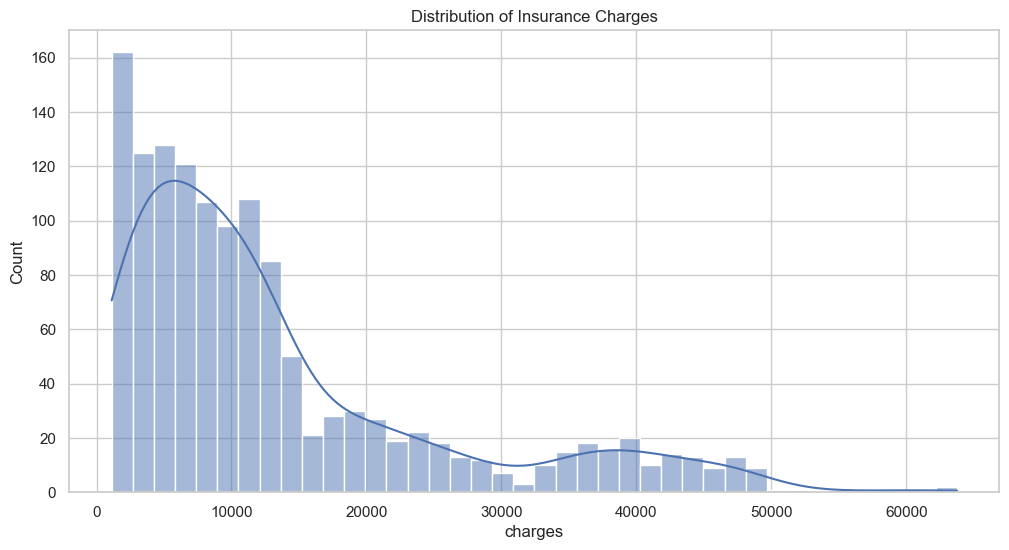

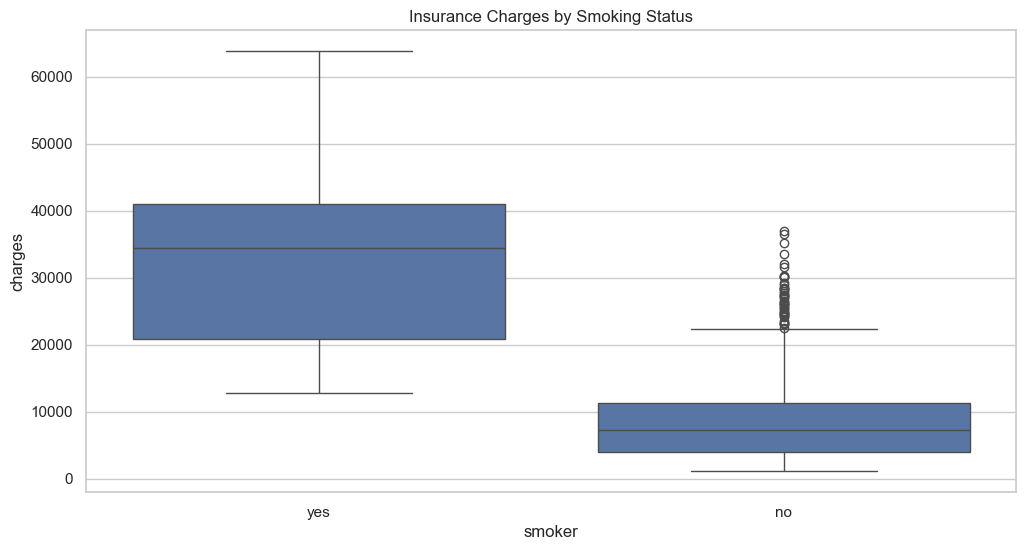

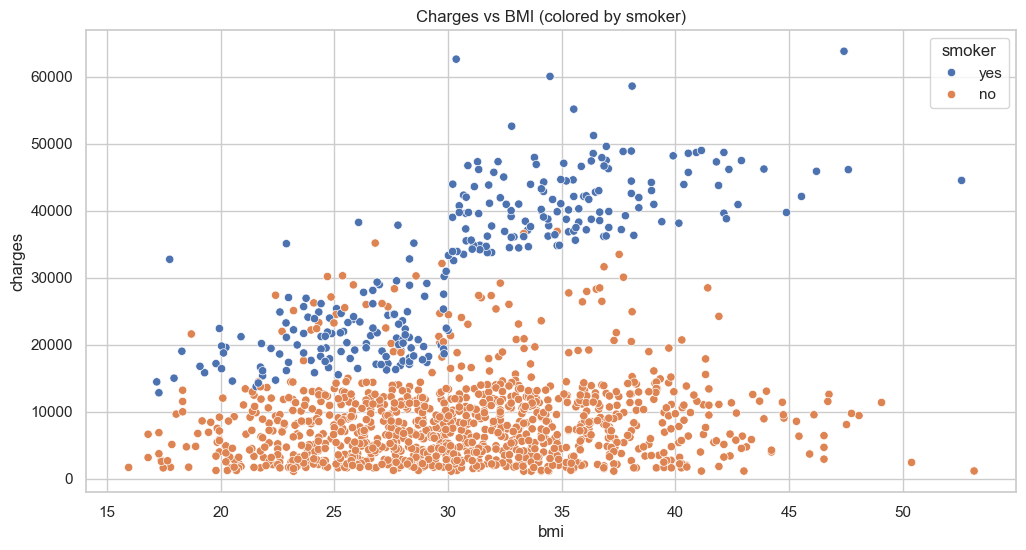

In [7]:
df.describe()

sns.histplot(df['charges'], bins=40, kde=True)
plt.title("Distribution of Insurance Charges")
plt.show()

sns.boxplot(x='smoker', y='charges', data=df)
plt.title("Insurance Charges by Smoking Status")
plt.show()

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Charges vs BMI (colored by smoker)")
plt.show()


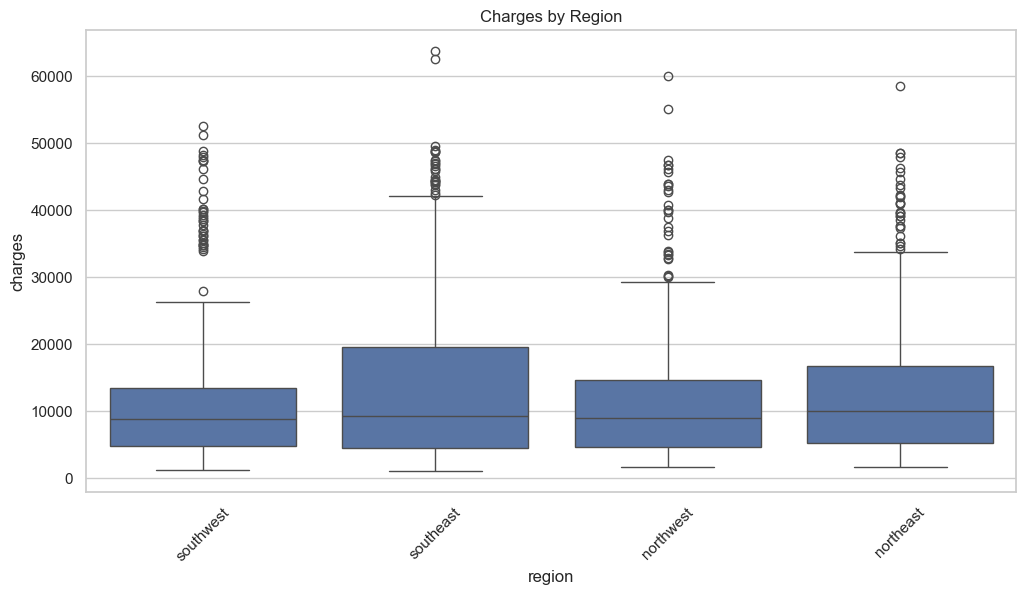

In [9]:
sns.boxplot(x='region', y='charges', data=df)
plt.title("Charges by Region")
plt.xticks(rotation=45)
plt.show()



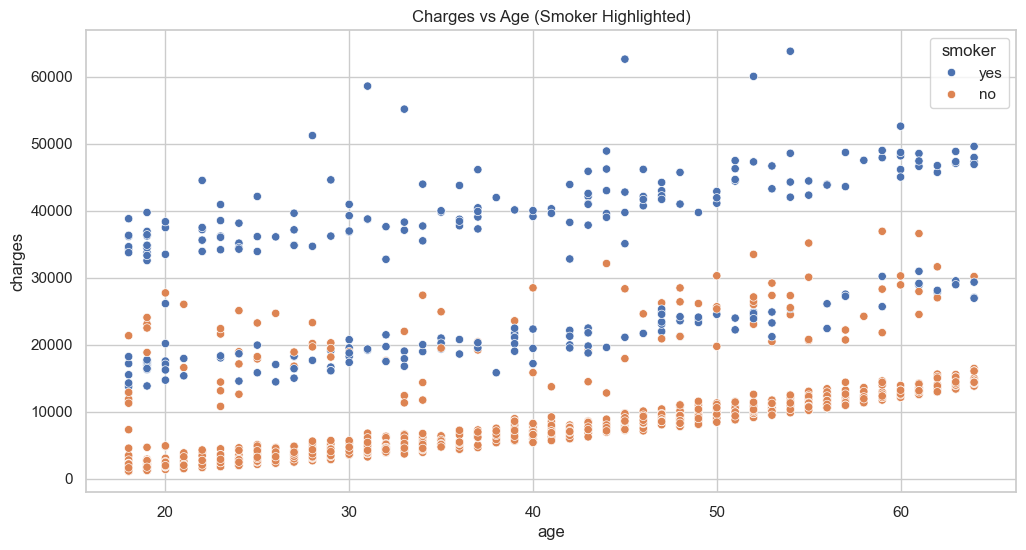

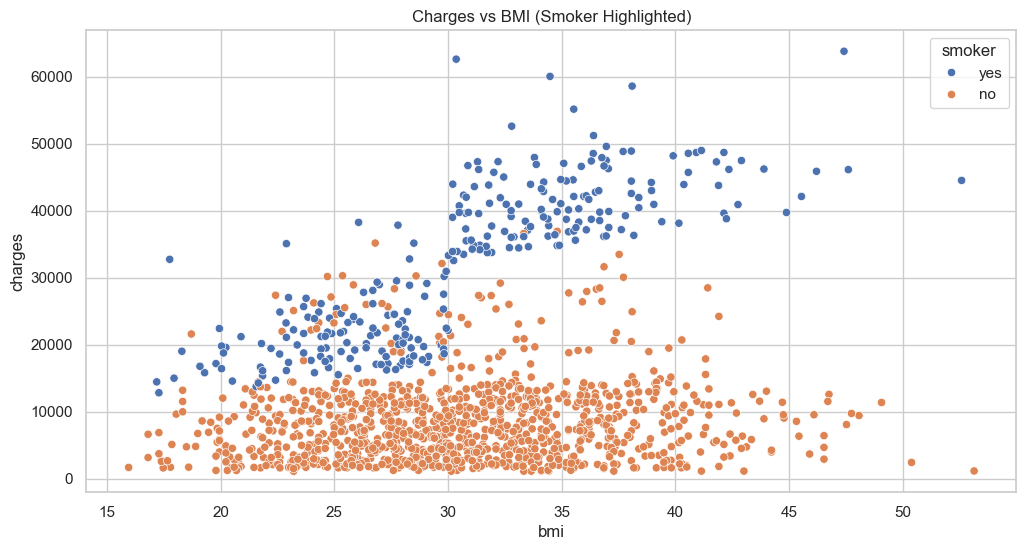

In [10]:
sns.scatterplot(x='age', y='charges', hue='smoker', data=df)
plt.title("Charges vs Age (Smoker Highlighted)")
plt.show()

sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)
plt.title("Charges vs BMI (Smoker Highlighted)")
plt.show()


In [12]:
from scipy.stats import ttest_ind

smokers = df[df['smoker'] == 'yes']['charges']
nonsmokers = df[df['smoker'] == 'no']['charges']

t_stat, p_value = ttest_ind(smokers, nonsmokers, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


T-statistic: 32.7519, P-value: 0.0000


In [13]:
male = df[df['sex'] == 'male']['charges']
female = df[df['sex'] == 'female']['charges']

t_stat, p_value = ttest_ind(male, female, equal_var=False)
print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")


T-statistic: 2.1009, P-value: 0.0358


In [14]:
from scipy.stats import f_oneway

regions = df['region'].unique()
region_groups = [df[df['region'] == r]['charges'] for r in regions]

f_stat, p_value = f_oneway(*region_groups)
print(f"F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}")


F-statistic: 2.9696, P-value: 0.0309


In [15]:
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [16]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns='charges')
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")


MSE: 33596915.85
R²: 0.78


In [18]:
coeffs = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeffs)


            Feature   Coefficient
4        smoker_yes  23651.128856
7  region_southwest   -809.799354
6  region_southeast   -657.864297
2          children    425.278784
5  region_northwest   -370.677326
1               bmi    337.092552
0               age    256.975706
3          sex_male    -18.591692


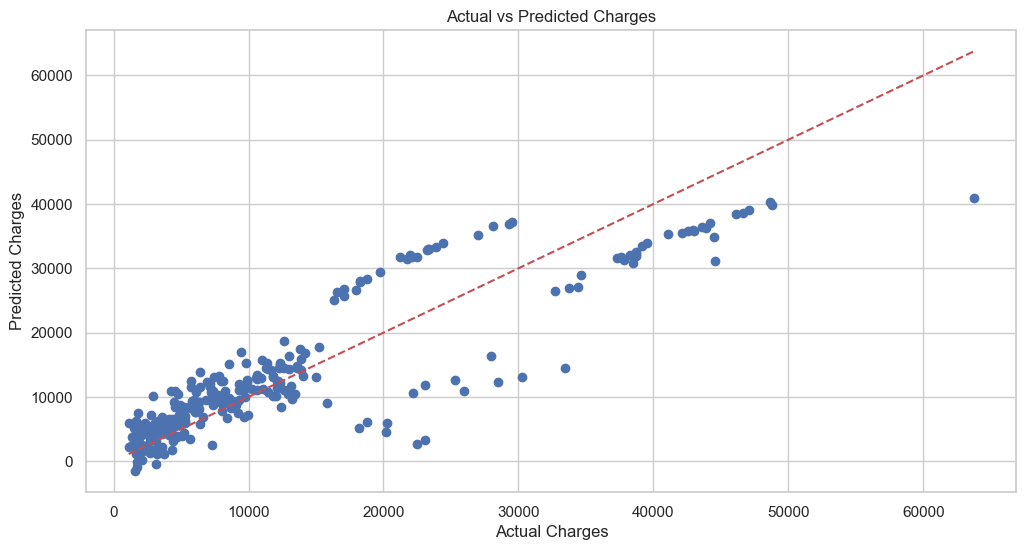

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')  # reference line
plt.show()


In [25]:
import os
import pandas as pd

# Load dataset
df = pd.read_csv('../data/insurance.csv')

# Drop missing values
df_cleaned = df.dropna()

# Ensure 'data' directory exists
os.makedirs('data', exist_ok=True)

# Save cleaned dataframe to CSV
df_cleaned.to_csv('data/processed_data.csv', index=False)


Summary statistics:
                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq       

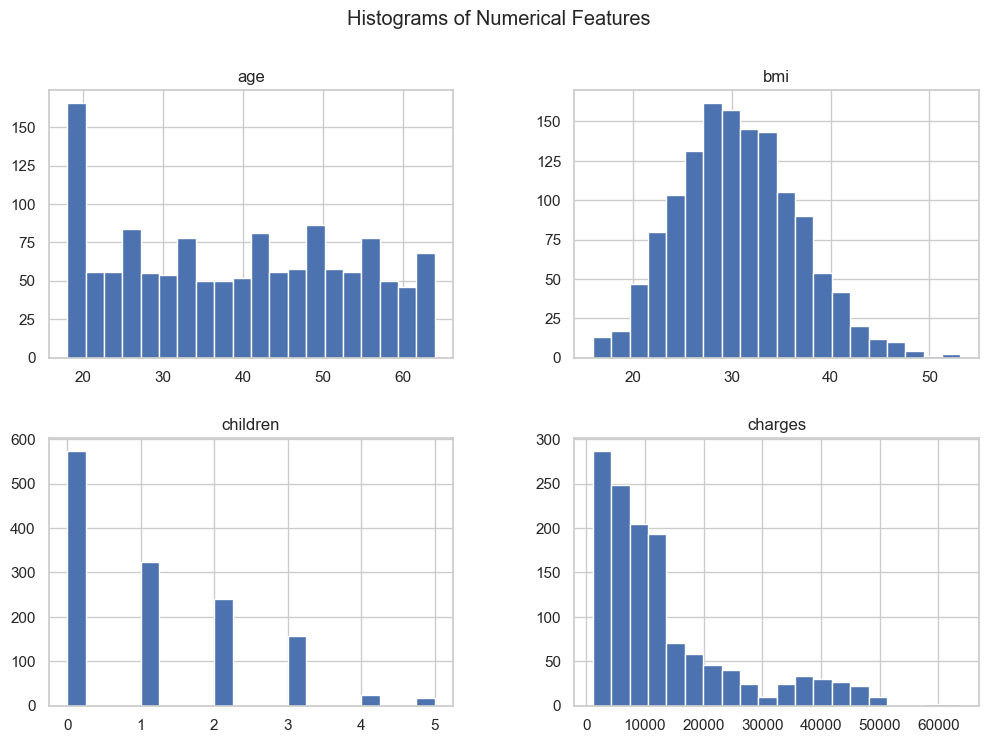

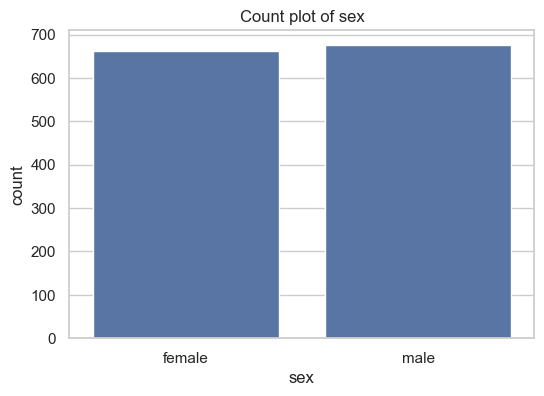

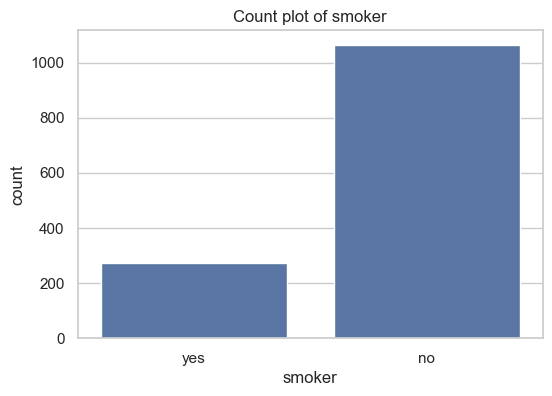

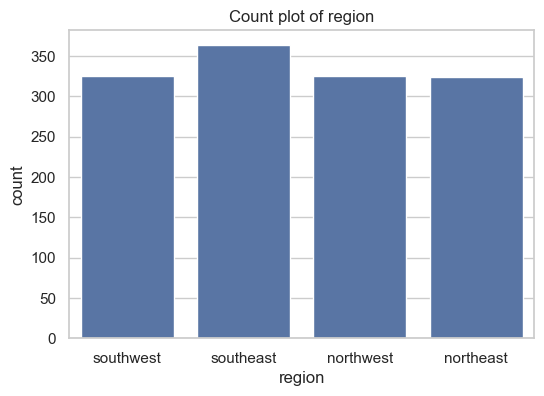

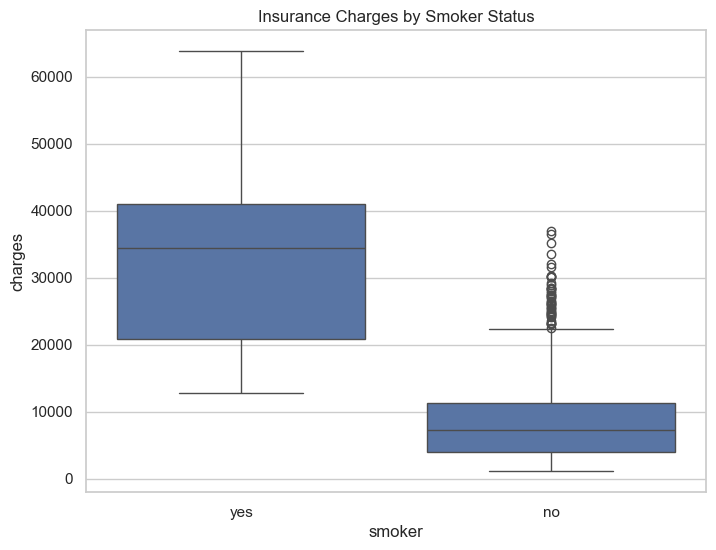

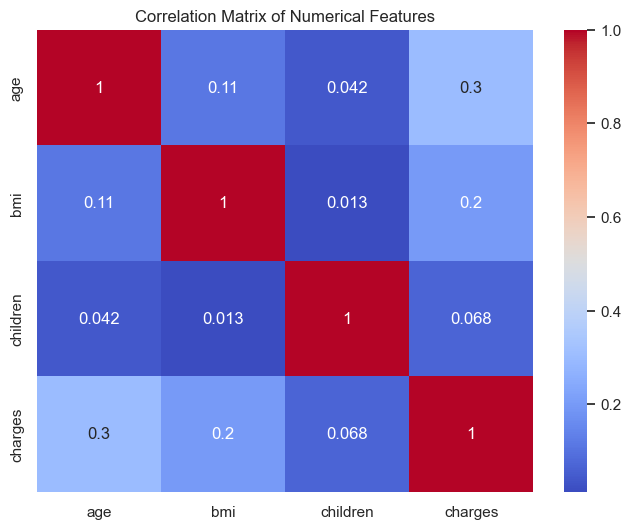

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv('data/processed_data.csv')

# Summary statistics
print("Summary statistics:")
print(df.describe(include='all'))

# Check distribution of numerical variables
num_cols = ['age', 'bmi', 'children', 'charges']
df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Count plots for categorical features
cat_cols = ['sex', 'smoker', 'region']
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count plot of {col}')
    plt.show()

# Boxplot for charges by smoker status
plt.figure(figsize=(8,6))
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Insurance Charges by Smoker Status')
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [28]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

print("Columns after encoding:")
print(df_encoded.columns)


Columns after encoding:
Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')


Training samples: 1070, Testing samples: 268


In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Load cleaned data (assuming saved earlier)
df = pd.read_csv('data/processed_data.csv')

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 33596915.85
R^2 Score: 0.78


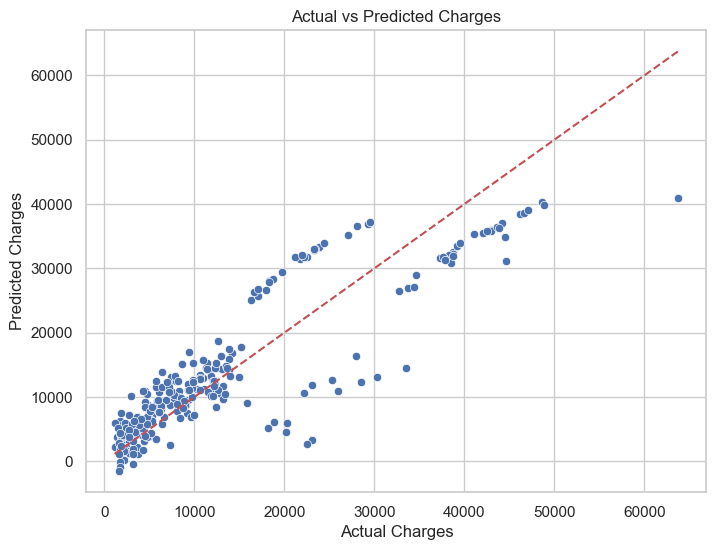

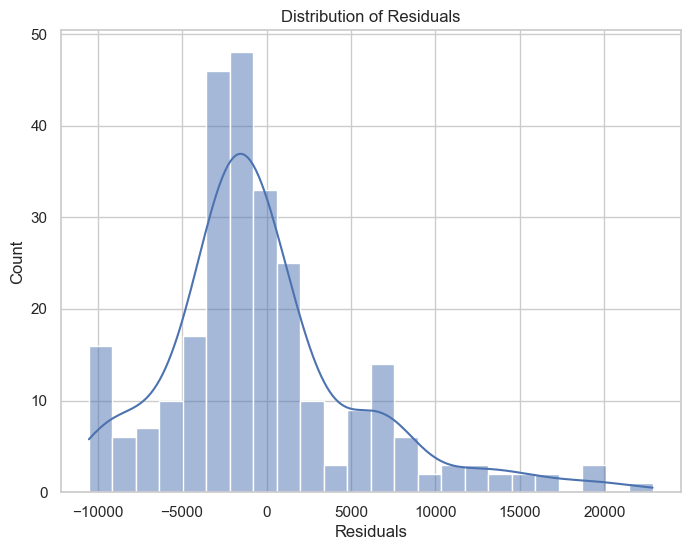

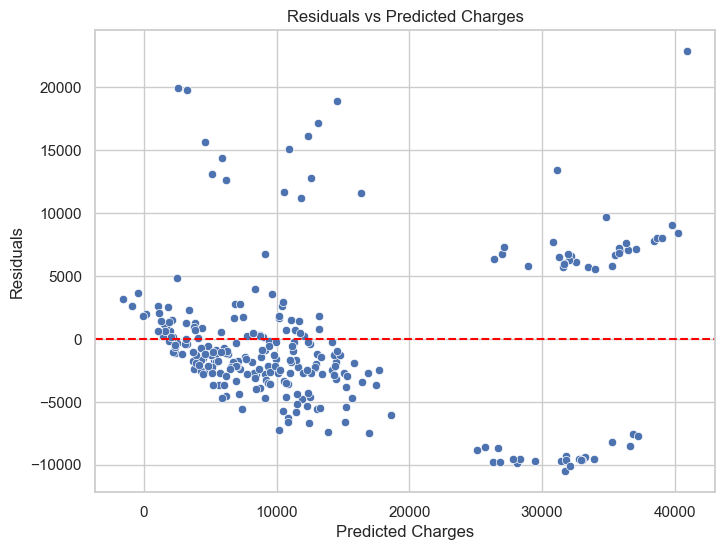

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot actual vs predicted charges
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Charges")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

# Residuals vs predicted values plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Charges")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Charges")
plt.show()
